## GDP 비율과 정부 관련 의료투자 비용 즉, 나라별 수준에 연관한 분석
- 모성 사망률 (My .... )


###### To_do
1. Nan값 삭제
2. 국가코드, 반구, 개발도상국 삭제

 - 전체 나라의 산모사망률 스캐터 혹은 히스토그램 그리기
 - GDP - 산모사망률 스캐터 
 - 10만명 당 의사 비율과 산모 사망률 간의 스캐터

###### 나라 리스트화 (대비용)
 - 아메리카 = ['미국','멕시코','자메이카','쿠바','브라질','콜롬비아','아르헨티나','칠레','우루과이','페루','에콰도르']
 - 아시아 = ['대한민국','일','중국','러시아','싱가폴','캄보디아','필리핀','태국','방글라데시','인도','파키스탄','우즈베키스탄','사우디아라비아','쿠웨이트','이스라엘']
 - 아메리카 = ['미국','멕시코','자메이카','쿠바','브라질','콜롬비아','아르헨티나','칠레','우루과이','페루','에콰도르']
 - 오세아니아 = ['호주', '뉴질랜드']

###### 열 목록 정리본 
- Life_Expectancy Data.csv 열 목록
    Country	: 나라
    Year : 년도
    Status : 경제성장
    Life expectancy : 기대수명
    Adult Mortality	 : 성인 사망률
    infant deaths : 유아 사망
    Alcohol	: 1인 알코올 소비량
    percentage expenditure	: GDP 대비 건강 지출 비용
    Hepatitis B	: B형 간염 예방 접종률
    Measles : 홍역
    BMI : BMI
    under-five deaths 	: 5세 이하 사망
    Polio	: 소아 마비
    Total expenditure	: 총 지출
    Diphtheria :  디프테리아 병 (어린이 급성 전염병 / 파상풍)
    HIV/AIDS	: 에이즈
    GDP	 : 국내 총 생산
    Population	: 인구
    thinness  : 저체중
    1-19 years thinness : 5-9 years	
    Income composition of resources	: 자원 소득
    Schooling : 교육

- Maternal Mortality 열 목록
    ISO3 : 국가코드
    Country	: 나라
    Continent : 대륙
    Hemisphere	: 반구
    Human Development Groups	: 개발 수준
    UNDP Developeing Regions	: UNDP 대상의 개발 도상국
    HDI Rank (2021)	: 인간개발지수 순위 // 일종의 행복지수 
    Maternal Mortality Ratio (deaths per 100,000 live births) : 10만명 당 산모 사망률

### 준비과정

In [1332]:
# [1] 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm 
from matplotlib import rc 

In [1333]:
# [2] 데이터 준비
file_GDF = r'GDPinfo.xlsx'
file_Life = r'Life Expectancy Data.csv'
file_Mater = r'Maternal Mortality.csv'
file_doc = r'DoctorsPer.csv'

GdpDF = pd.read_excel(file_GDF)
LifeDF = pd.read_csv(file_Life)
MaternalDF = pd.read_csv(file_Mater)
docDF = pd.read_csv(file_doc)

In [1334]:
# 적용할 폰트 파일
FONT_FILE = r'c:\WINDOWS\Fonts\H2GTRM.TTF'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

### 모성 사망 전처리 및 사망률 변동 그래프

#### 데이터 전처리

In [1335]:
MaternalDF
# 유사 정보 혹은 필요없는 열 삭제 + 1990 ~ 2021년도 데이터 존재. 필요없는 년도의 데이터는 삭제 필요

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developeing Regions,HDI Rank (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (1990)","Maternal Mortality Ratio (deaths per 100,000 live births) (1991)","Maternal Mortality Ratio (deaths per 100,000 live births) (1992)",...,"Maternal Mortality Ratio (deaths per 100,000 live births) (2012)","Maternal Mortality Ratio (deaths per 100,000 live births) (2013)","Maternal Mortality Ratio (deaths per 100,000 live births) (2014)","Maternal Mortality Ratio (deaths per 100,000 live births) (2015)","Maternal Mortality Ratio (deaths per 100,000 live births) (2016)","Maternal Mortality Ratio (deaths per 100,000 live births) (2017)","Maternal Mortality Ratio (deaths per 100,000 live births) (2018)","Maternal Mortality Ratio (deaths per 100,000 live births) (2019)","Maternal Mortality Ratio (deaths per 100,000 live births) (2020)","Maternal Mortality Ratio (deaths per 100,000 live births) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,1500.0,1530.0,1520.0,...,858.0,810.0,786.0,701.0,673.0,638.0,638.0,638.0,638.0,638.0
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,1150.0,1100.0,1130.0,...,281.0,269.0,258.0,251.0,246.0,241.0,241.0,241.0,241.0,241.0
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,40.0,47.0,49.0,...,17.0,16.0,16.0,15.0,16.0,15.0,15.0,15.0,15.0,15.0
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,13.0,12.0,11.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,Oceania,Southern Hemisphere,High,EAP,111.0,144.0,137.0,127.0,...,52.0,48.0,47.0,45.0,44.0,43.0,43.0,43.0,43.0,43.0
191,YEM,Yemen,Asia,Northern Hemisphere,Low,AS,183.0,430.0,450.0,413.0,...,184.0,175.0,174.0,169.0,165.0,164.0,164.0,164.0,164.0,164.0
192,ZAF,South Africa,Africa,Southern Hemisphere,High,SSA,109.0,172.0,162.0,156.0,...,143.0,133.0,128.0,125.0,122.0,119.0,119.0,119.0,119.0,119.0
193,ZMB,Zambia,Africa,Southern Hemisphere,Medium,SSA,154.0,633.0,632.0,636.0,...,267.0,254.0,242.0,232.0,222.0,213.0,213.0,213.0,213.0,213.0


In [1336]:
## [3-1] LifeDF 데이터 전처리
# 필요없는 
# ISO3 / Continent / Hemisphere / UNDP Developeing Regions 삭제 (안 쓸 예정)
MaternalDF.drop(['ISO3','Continent','Hemisphere','UNDP Developeing Regions'], axis=1, inplace=True)

# year_list라는 빈 리스트를 만들어서 삭제할 열들 추려내기. 
year_unlist = []
for i in range(1990,2005):
    year_unlist.append(f"Maternal Mortality Ratio (deaths per 100,000 live births) ({i})")
for i in range(2016,2022):
    year_unlist.append(f"Maternal Mortality Ratio (deaths per 100,000 live births) ({i})")
# 사용할 년도의 정보값 남겨두고 삭제
MaternalDF.drop(MaternalDF[year_unlist], axis=1, inplace=True)


# Year 열 이름이 너무 길어요! 변경합시다.
year_list = [i for i in range(2005,2016)]   # 변경할 년도들로 다시 리스트 꾸려서
MaternalDF.columns = ['Country','Human Development Groups','HDI Rank (2021)']+year_list# 칼럼 값에 대입, 변경

MaternalDF #확인용
# 

,Country,Human Development Groups,HDI Rank (2021),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,Low,180.0,1140.0,1120.0,1090.0,1030.0,993.0,954.0,905.0,858.0,810.0,786.0,701.0
1,Angola,Medium,148.0,519.0,473.0,431.0,395.0,359.0,326.0,300.0,281.0,269.0,258.0,251.0
2,Albania,High,67.0,22.0,18.0,19.0,20.0,20.0,21.0,22.0,17.0,16.0,16.0,15.0
3,Andorra,Very High,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,Very High,26.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,High,111.0,72.0,66.0,62.0,60.0,58.0,58.0,54.0,52.0,48.0,47.0,45.0
191,Yemen,Low,183.0,242.0,230.0,219.0,208.0,200.0,192.0,187.0,184.0,175.0,174.0,169.0
192,South Africa,High,109.0,201.0,201.0,199.0,191.0,179.0,171.0,161.0,143.0,133.0,128.0,125.0
193,Zambia,Medium,154.0,421.0,406.0,387.0,356.0,329.0,305.0,283.0,267.0,254.0,242.0,232.0


In [1337]:
# 결측치 확인
MaternalDF.isna().sum()

Country                      0
Human Development Groups     4
HDI Rank (2021)              4
2005                        11
2006                        11
2007                        11
2008                        11
2009                        11
2010                        11
2011                        11
2012                        11
2013                        11
2014                        11
2015                        11
dtype: int64

In [1338]:
# 결측치 삭제!
MaternalDF.dropna(inplace=True)
# df.astype({'col1':'int32'})

MaternalDF.isnull().sum()

Country                     0
Human Development Groups    0
HDI Rank (2021)             0
2005                        0
2006                        0
2007                        0
2008                        0
2009                        0
2010                        0
2011                        0
2012                        0
2013                        0
2014                        0
2015                        0
dtype: int64

In [1339]:
# MaternalDF[year_list].columns.to_list()       # 2005~2015 년도 칼럼 리스트 
# 나라별 2005~2015 값 . 시리즈로 해서 라인 뽑아야함....
MaternalDF.set_index('Country', inplace=True) # 나라를 인덱스로 변경
# MaternalDF['Country'].to_list()
MaternalDF
# test

,Human Development Groups,HDI Rank (2021),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,
Afghanistan,Low,180.0,1140.0,1120.0,1090.0,1030.0,993.0,954.0,905.0,858.0,810.0,786.0,701.0
Angola,Medium,148.0,519.0,473.0,431.0,395.0,359.0,326.0,300.0,281.0,269.0,258.0,251.0
Albania,High,67.0,22.0,18.0,19.0,20.0,20.0,21.0,22.0,17.0,16.0,16.0,15.0
United Arab Emirates,Very High,26.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
Argentina,Very High,47.0,59.0,57.0,56.0,53.0,56.0,51.0,48.0,47.0,44.0,42.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,High,111.0,72.0,66.0,62.0,60.0,58.0,58.0,54.0,52.0,48.0,47.0,45.0
Yemen,Low,183.0,242.0,230.0,219.0,208.0,200.0,192.0,187.0,184.0,175.0,174.0,169.0
South Africa,High,109.0,201.0,201.0,199.0,191.0,179.0,171.0,161.0,143.0,133.0,128.0,125.0


In [1340]:
Mat_YearDF = MaternalDF[year_list]

In [1341]:
MaternalDF.count()

Human Development Groups    182
HDI Rank (2021)             182
2005                        182
2006                        182
2007                        182
2008                        182
2009                        182
2010                        182
2011                        182
2012                        182
2013                        182
2014                        182
2015                        182
dtype: int64

In [1342]:
# 형 변환

# list_1 = []
# for i in MaternalDF[year_list]:
#     list_1.append(f"{i}" + ":'int64', ")
# # print(str(list_1)
# list_1 = '{' + f"{str(list_1)}" +'}'
# list_1

# 형 변환, 형 벼ㅛㄴ환!!!!!!!!!!!!! float에서 int32로 변환 ...
Mat_YearDF = Mat_YearDF.astype(dtype='int32')
MaternalDF[year_list] = Mat_YearDF
MaternalDF

,Human Development Groups,HDI Rank (2021),2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,
Afghanistan,Low,180.0,1140,1120,1090,1030,993,954,905,858,810,786,701
Angola,Medium,148.0,519,473,431,395,359,326,300,281,269,258,251
Albania,High,67.0,22,18,19,20,20,21,22,17,16,16,15
United Arab Emirates,Very High,26.0,5,4,4,4,4,4,4,4,3,3,3
Argentina,Very High,47.0,59,57,56,53,56,51,48,47,44,42,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,High,111.0,72,66,62,60,58,58,54,52,48,47,45
Yemen,Low,183.0,242,230,219,208,200,192,187,184,175,174,169
South Africa,High,109.0,201,201,199,191,179,171,161,143,133,128,125


In [1343]:
# def get_Top(obj,idx,i):
#     test = sorted(obj[idx].to_list(), reverse=True)
#     test = test[:i]
#     print(test)
#     return test

In [1344]:
# plt.plot(year_list, Mat_YearDF.iloc[4])

#### 모성 사망률 그래프

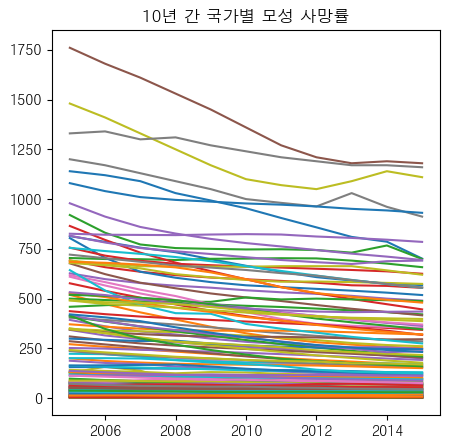

In [1345]:
# 10년간 각 국의 산모사망률 동향 파악
# plt.plot([x축 리스트], [y축 리스트])
# plt.plot(MaternalDF[year_list].columns.to_list(), MaternalDF[year_list])
plt.figure(figsize=(5,5))

for i in range(182):
    plt.plot(year_list, Mat_YearDF.iloc[i])

# for MaternalDF[]
# plt.plot(MaternalDF[year_list])

plt.title("10년 간 국가별 모성 사망률")
plt.show()

In [1346]:
# Top10_MatDF = Mat_YearDF[Mat_YearDF[2005]==TopMat]
# 2005년 사망률 탑 10만 꼽아보자

TopMat = sorted(Mat_YearDF[2005].to_list(),reverse = True)
TopMat = TopMat[:10]
TopMat

Top10_of_2005 = Mat_YearDF[Mat_YearDF[2005].isin(TopMat)]

In [1347]:
Top10List = Top10_of_2005.index.to_list()

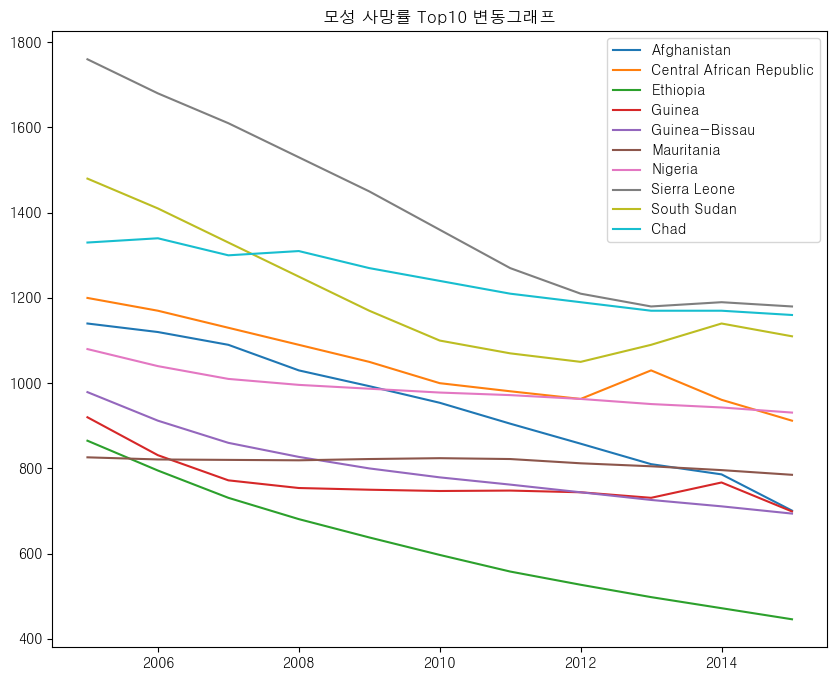

In [1348]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.plot(year_list, Top10_of_2005.iloc[i])

# for MaternalDF[]
# plt.plot(MaternalDF[year_list])

plt.title("모성 사망률 Top10 변동그래프")
plt.legend(Top10_of_2005.index.to_list())
plt.show()

### 

### GDP 연관 준비

#### LifeDF 전처리

In [1349]:
LifeDF

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


삭제할 것
 1. 'Life expectancy', 'Adult Mortality', 'Hepatitis B','Measles', 'Polio', 'thinness 1-19 years', 'thinness 5-9 years',
 
  

In [1350]:
LifeDF

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [1351]:
LifeDF.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [1352]:
# 필요없는 것 삭제
# MaternalDF.drop(['ISO3','Continent','Hemisphere','UNDP Developeing Regions'], axis=1, inplace=True)
LifeDF.drop(['Life expectancy ', 'Adult Mortality', 'Hepatitis B','Measles ',' BMI ', 'Polio', ' thinness  1-19 years', ' thinness 5-9 years'],axis=1,inplace=True)

In [1353]:
idx = LifeDF[(LifeDF['Year']<2005) | (LifeDF['Year']>2015)].index
LifeDF.drop(idx, inplace=True)
# LifeDF['GDP'].isna().sum

In [1354]:
LifeDF

,Country,Year,Status,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,62,0.01,71.279624,83,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,64,0.01,73.523582,86,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,66,0.01,73.219243,89,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,69,0.01,78.184215,93,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,71,0.01,7.097109,97,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Zimbabwe,2009,Developing,30,4.64,1.040021,45,6.26,73.0,18.1,65.824121,1381599.0,0.419,9.9
2929,Zimbabwe,2008,Developing,30,3.56,20.843429,46,4.96,75.0,20.5,325.678573,13558469.0,0.421,9.7
2930,Zimbabwe,2007,Developing,29,3.88,29.814566,46,4.47,73.0,23.7,396.998217,1332999.0,0.414,9.6
2931,Zimbabwe,2006,Developing,28,4.57,34.262169,45,5.12,7.0,26.8,414.796232,13124267.0,0.408,9.5


#### GDP DF 전처리

In [1355]:
gdpyear = [i for i in range(1980,2030)]
GDPunyear = [i for i in range(1980,2005)] + [i for i in range(2016,2030)]
GdpDF.columns = ['GDP']+ gdpyear

In [1356]:
GdpDF.set_index('GDP', inplace=True)
GdpDF.drop(GdpDF[GDPunyear], axis=1, inplace=True)

In [1357]:
GdpDF.dropna(inplace=True)

#### Life <- GDP 데이터 넣기

In [1358]:
# 필요 나라에 GDP가 비어있는지 확인.
# LifeDF[LifeDF.isna()] 
NaNGDF = LifeDF[LifeDF['GDP'].isna()]['Country'].unique()
NaNGDF
# NaNGDF.drop_duplicates()
# NaNGDF.drop_duduplicates([0])
"""
'United Kingdom of Great Britain and Northern Ireland',
'United States of America'
'Republic of Korea'
"""

"\n'United Kingdom of Great Britain and Northern Ireland',\n'United States of America'\n'Republic of Korea'\n"

In [1359]:
GdpDF = GdpDF.T
GdpDF

GDP,"Korea, Republic of",United Kingdom,United States,Advanced economies,World
2005,19398.494,42143.874,44034.256,36353.779,7447.064
2006,21730.952,44589.681,46216.853,37985.119,7966.832
2007,24083.338,50419.848,47943.353,41219.750,8880.793
2008,21387.709,47884.160,48470.553,43256.825,9625.997
2009,19139.732,38892.333,47102.428,40566.304,9006.034
2010,23077.161,39641.869,48586.288,42149.552,9732.711
2011,25100.188,42106.640,50008.108,45010.186,10702.121
2012,25459.168,42501.709,51736.738,44637.732,10756.307
2013,27179.519,43469.644,53363.904,44871.215,10934.878
2014,29252.933,47468.211,55263.817,45706.675,11091.407


In [1360]:
# GdpDF
GdpDF.sort_index(ascending=False, inplace=True) # null값 채워넣기 용도
GdpDF

GDP,"Korea, Republic of",United Kingdom,United States,Advanced economies,World
2015,28737.439,44978.619,57006.926,43049.961,10344.892
2014,29252.933,47468.211,55263.817,45706.675,11091.407
2013,27179.519,43469.644,53363.904,44871.215,10934.878
2012,25459.168,42501.709,51736.738,44637.732,10756.307
2011,25100.188,42106.640,50008.108,45010.186,10702.121
2010,23077.161,39641.869,48586.288,42149.552,9732.711
2009,19139.732,38892.333,47102.428,40566.304,9006.034
2008,21387.709,47884.160,48470.553,43256.825,9625.997
2007,24083.338,50419.848,47943.353,41219.750,8880.793
2006,21730.952,44589.681,46216.853,37985.119,7966.832


중간 체크 ....
    Life 결측치 확인 및 삭제
    Life 년도 수 2005~2015로 축약

    GDP에서 Life에 넣을 준비.

In [1361]:
# LifeDF.loc[]
# LifeDF[LifeDF['Republic of Korea']

In [1362]:
# 결측치 확인
LifeDF.isna().sum()

Country                              0
Year                                 0
Status                               0
infant deaths                        0
Alcohol                            189
percentage expenditure               0
under-five deaths                    0
Total expenditure                  208
Diphtheria                           7
 HIV/AIDS                            0
GDP                                308
Population                         452
Income composition of resources    117
Schooling                          113
dtype: int64

#### Life <- GDP 이식.. 완료

LifeDF[LifeDF['Country'] == 'United Kingdom of Great Britain and Northern Ireland']['GDP'] = GdpDF['Korea, Republic of']
'United States of America'
'Republic of Korea'

In [1363]:
# LifeDF[LifeDF['Country'] == 'United Kingdom of Great Britain and Northern Ireland']

In [1364]:
ukDF = GdpDF['United Kingdom'].values.astype('int64').tolist()
krDF = GdpDF['Korea, Republic of'].values.astype('int64').tolist()
usDF = GdpDF['United States'].values.astype('int64').tolist()

In [1365]:
LifeDF.loc[LifeDF['Country'] == 'United Kingdom of Great Britain and Northern Ireland','GDP'] = ukDF
LifeDF.loc[LifeDF['Country'] == 'Republic of Korea','GDP'] = krDF
LifeDF.loc[LifeDF['Country'] == 'United States of America','GDP'] = usDF

In [1366]:
Mat_YearDF

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,
Afghanistan,1140,1120,1090,1030,993,954,905,858,810,786,701
Angola,519,473,431,395,359,326,300,281,269,258,251
Albania,22,18,19,20,20,21,22,17,16,16,15
United Arab Emirates,5,4,4,4,4,4,4,4,3,3,3
Argentina,59,57,56,53,56,51,48,47,44,42,41
...,...,...,...,...,...,...,...,...,...,...,...
Samoa,72,66,62,60,58,58,54,52,48,47,45
Yemen,242,230,219,208,200,192,187,184,175,174,169
South Africa,201,201,199,191,179,171,161,143,133,128,125


##### Mat_YearDF

In [1367]:
LifeDF.count(), Mat_YearDF.count()*11

(Country                            2023
 Year                               2023
 Status                             2023
 infant deaths                      2023
 Alcohol                            1834
 percentage expenditure             2023
 under-five deaths                  2023
 Total expenditure                  1815
 Diphtheria                         2016
  HIV/AIDS                          2023
 GDP                                1748
 Population                         1571
 Income composition of resources    1906
 Schooling                          1910
 dtype: int64,
 2005    2002
 2006    2002
 2007    2002
 2008    2002
 2009    2002
 2010    2002
 2011    2002
 2012    2002
 2013    2002
 2014    2002
 2015    2002
 dtype: int64)

##### LifeDF 와 MatDF 합치기

In [1368]:
# LifeDF 일반 인덱스에서 나라명으로 변경.
LifeDF.set_index('Country', inplace=True)

In [1369]:
# 각 데이터가 들고 있는 나라 수.
len(list(set(LifeDF.index))), len(Mat_YearDF.index)

(193, 182)

In [1370]:
# # 모성 사망률에 있는 데이터가 Life에 온전히 있는가? 
# bool_list = []
# for i in range(len(Mat_YearDF.index)):
#     if Mat_YearDF.index[i] in list(set(LifeDF.index)):  
#         bool_list.append(f"{Mat_YearDF.index[i]} : {True}")
#     else:
#         bool_list.append(f"{Mat_YearDF.index[i]} : {False}")
# bool_list

In [1371]:
# 모성 사망률에 있는 데이터가 Life에 온전히 있는가? 
bool_list = []
for i in range(len(Mat_YearDF.index)):
    if Mat_YearDF.index[i] in list(set(LifeDF.index)):  
        bool_list.append(Mat_YearDF.index[i]) 
        bool_list.append(True)
    else:
        bool_list.append(Mat_YearDF.index[i]) 
        bool_list.append(False)
bool_list

len(bool_list)
# 짝수가 나라, 홀수가 True False  
# range로 
# country_bool_dict={}

CBDict = {}

for i in range(0,len(bool_list),2):
        CBDict[bool_list[i]] = bool_list[i+1]
CBDict  # 모상 사망률 데이터가 있는 나라가, LifeDF에 있는지 체크. False면 없으니 삭제 혹시 나라명 확인 예정

# 없는 나라를 찾아보자.
for k, v in CBDict.items():
 if v == False:
  print(k)
# 결과 값 
"""
Bolivia, Brunei, Ivory Coast, The Democratic Republic of the Congo, Micronesia
United Kingdom,Iran,South Korea, Lao, Moldova, North Macedonia,
Palestine, State of, Eswatini, Tanzania, United States,Venezuela,
"""
# True값은 Life와 GDP와 공통 인덱스 가능. 묶을 수 있다. 
# 위의 빠진 나라들은 ... 필요한 나라들만 더 추가해서 주겠다. 

gdp_life =[]
for k, v in CBDict.items():
    if v == True:
        gdp_life.append(k)


Bolivia
Brunei
Ivory Coast
The Democratic Republic of the Congo
Micronesia
United Kingdom
Iran
South Korea
Lao
Moldova
North Macedonia
Palestine, State of
Eswatini
Tanzania
United States
Venezuela


In [1372]:
len(gdp_life)

166

In [1373]:
lifeidx = list(set(LifeDF.index))
for i in gdp_life:
    if i in lifeidx: # 이 리스트에서
        lifeidx.remove(i)
lifeidx # LifeDF에 남아있는 것들. 삭제 및 글 수정을 해줘야한다.

LifeDF.shape

(2023, 13)

In [1374]:
# 결과 값 중에서는 영국, 한국, 미국만 .. 살린다. 나머지는 삭제 
# United Kingdom of Great Britain and Northern Ireland -> United Kingdom
# Republic of Korea -> South Korea
# 'United States of America'-> United States
for i in ['United Kingdom of Great Britain and Northern Ireland','Republic of Korea','United States of America']:
    lifeidx.remove(i)

In [1375]:
LifeDF.drop(lifeidx, inplace=True)

In [1376]:
LifeDF.index

Index(['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan',
       ...
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],
      dtype='object', name='Country', length=1859)

In [1377]:
LifeDF.reset_index(inplace=True)

In [1378]:
LifeDF.loc[ LifeDF['Country']=='United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'United Kingdom'
LifeDF.loc[ LifeDF['Country']=='Republic of Korea', 'Country'] = 'South Korea'
LifeDF.loc[ LifeDF['Country']=='United States of America', 'Country'] = 'United States'

In [1379]:
gdp_life.append('United Kingdom')
gdp_life.append('South Korea')
gdp_life.append('United States')
# gdp_life

#### 와 드디어 데이터 인덱스 통합!
 - Mat_YearDF의 칼럼별 값을, Countty가 동일하고.  Life의 Year 값도 동일한 행에 새로이 Mat_YearDF를 심어준다 ...
 - 음, 망했어요. 

In [1380]:
# LifeDF.head(3)
Mat_YearDF

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,
Afghanistan,1140,1120,1090,1030,993,954,905,858,810,786,701
Angola,519,473,431,395,359,326,300,281,269,258,251
Albania,22,18,19,20,20,21,22,17,16,16,15
United Arab Emirates,5,4,4,4,4,4,4,4,3,3,3
Argentina,59,57,56,53,56,51,48,47,44,42,41
...,...,...,...,...,...,...,...,...,...,...,...
Samoa,72,66,62,60,58,58,54,52,48,47,45
Yemen,242,230,219,208,200,192,187,184,175,174,169
South Africa,201,201,199,191,179,171,161,143,133,128,125


DataFrame.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)

인덱스 일치하도록 맞춰놓았으니 정렬 후 

In [1381]:
# Mat_YearDF.head(1)
Mat_YearDF.loc[Mat_YearDF.index=='Yemen']

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,
Yemen,242,230,219,208,200,192,187,184,175,174,169


In [1382]:
# Mat_YearDF.loc[Mat_YearDF.index=='Afghanistan']     # Afghanistan 만 DF형식으로 쫙 나옴.

# for i in gdp_life:
#     MaMoList
# Mat_YearDF에서, gdp_life에 없는 애들은 삭제. 있는 애들로만 구성한다.

conList = []
for i in list(Mat_YearDF.index):
    if i not in gdp_life:
        conList.append(i)
        
# # list(Mat_YearDF.index) not in gdp_life
# # conList # 13개국 뽑기 완료 . 이거 삭제하자 ...

for i in conList:
    Mat_YearDF.drop(i,inplace=True)
Mat_YearDF.shape


(169, 11)

In [1383]:
# Mat_YearDF.reset_index(inplace=True)
Mat_YearDF
LifeDF.sort_index(inplace=True)
Mat_YearDF.sort_index(inplace=True)
# Mat_YearDF.isna().sum()

In [1384]:
# Mat_YearDF.loc[Mat_YearDF['Country',2015]]

# Mat_YearDF.loc['Country',2015]
# Mat_YearDF.index[0]
# Mat_YearDF[Mat_YearDF.index[0]]

# Mat_YearDF.loc[('Country',2015)]

In [1385]:
# testDF = pd.wide_to_long(Mat_YearDF, stubnames=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015], i = 'country',  j="Maternal Mortality")
# testDF = pd.wide_to_long(Mat_YearDF, stubnames=['Year','Maternal Mortality'], i ='Country',j='Year')
# testDF

# list(Mat_YearDF.index)  # 나라 리스트
# len(Mat_YearDF.columns) # 11 , 인덱스 11회. int 11 
# Mat_YearDF.columns  # 2005~2015 인덱스
# len(Mat_YearDF.columns) # 11회
# int(Mat_YearDF.iloc[0].values[10])   # 값 추출
LifeDF.shape

(1859, 14)

In [1386]:

"""
{'나라' : [년도수 만큼 나라 반복] 다시 다음 나라 반복
년도 : 2015 ~ 2005년을 나라 수 만큼 반복
모상 사망률 : iloc[0]부터 끝까지 colums 끝에서 앞까지 반복
}

이걸로 새로운 데이터 셋을 만들어서 
"""
CountList = []  # 나라 리스트   -> Mamo값 만큼 나라 반복
for i in list(Mat_YearDF.index):
    for j in range(len(Mat_YearDF.columns)):
        CountList.append(i)

YearList = []   # 년도 값 리스트 -> Mamo값이 존재하는 만큼 2005~2015 반복 
for j in range(len(list(Mat_YearDF.index))):
    for i in Mat_YearDF.columns:
        YearList.append(i)

MaMoList = []   
for i in range(len(list(Mat_YearDF.index))):    # 나라 있는 만큼,
    for j in reversed(range(len(Mat_YearDF.columns))): # 년도수 반복중.
        MaMoList.append(int(Mat_YearDF.iloc[i].values[j]))
# Mat_YearDF.loc[0, '2015']

In [1387]:
len(CountList), len(YearList), len(MaMoList)

(1859, 1859, 1859)

#### 이젠 진짜 LifeDF에 N_MaMoDF 넣기

In [1388]:
NewMaMo = {'Country': CountList,
    'Year': reversed(YearList),
    'Maternal Mortality': MaMoList}

N_MaMoDF = pd.DataFrame(NewMaMo)
N_MaMoDF

,Country,Year,Maternal Mortality
0,Afghanistan,2015,701
1,Afghanistan,2014,786
2,Afghanistan,2013,810
3,Afghanistan,2012,858
4,Afghanistan,2011,905
...,...,...,...
1854,Zimbabwe,2009,632
1855,Zimbabwe,2008,657
1856,Zimbabwe,2007,671
1857,Zimbabwe,2006,680


In [1389]:
LifeDF['Maternal Mortality'] = N_MaMoDF['Maternal Mortality']
LifeDF

,Country,Year,Status,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Maternal Mortality
0,Afghanistan,2015,Developing,62,0.01,71.279624,83,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,701
1,Afghanistan,2014,Developing,64,0.01,73.523582,86,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,786
2,Afghanistan,2013,Developing,66,0.01,73.219243,89,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,810
3,Afghanistan,2012,Developing,69,0.01,78.184215,93,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,858
4,Afghanistan,2011,Developing,71,0.01,7.097109,97,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,Zimbabwe,2009,Developing,30,4.64,1.040021,45,6.26,73.0,18.1,65.824121,1381599.0,0.419,9.9,632
1855,Zimbabwe,2008,Developing,30,3.56,20.843429,46,4.96,75.0,20.5,325.678573,13558469.0,0.421,9.7,657
1856,Zimbabwe,2007,Developing,29,3.88,29.814566,46,4.47,73.0,23.7,396.998217,1332999.0,0.414,9.6,671
1857,Zimbabwe,2006,Developing,28,4.57,34.262169,45,5.12,7.0,26.8,414.796232,13124267.0,0.408,9.5,680


In [1390]:
idx = LifeDF[LifeDF['GDP'].isna()].index

In [1391]:
LifeDF.drop(idx, inplace=True)

In [1392]:
LifeDF[LifeDF['GDP']>0]

,Country,Year,Status,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Maternal Mortality
0,Afghanistan,2015,Developing,62,0.01,71.279624,83,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,701
1,Afghanistan,2014,Developing,64,0.01,73.523582,86,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,786
2,Afghanistan,2013,Developing,66,0.01,73.219243,89,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,810
3,Afghanistan,2012,Developing,69,0.01,78.184215,93,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,858
4,Afghanistan,2011,Developing,71,0.01,7.097109,97,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,Zimbabwe,2009,Developing,30,4.64,1.040021,45,6.26,73.0,18.1,65.824121,1381599.0,0.419,9.9,632
1855,Zimbabwe,2008,Developing,30,3.56,20.843429,46,4.96,75.0,20.5,325.678573,13558469.0,0.421,9.7,657
1856,Zimbabwe,2007,Developing,29,3.88,29.814566,46,4.47,73.0,23.7,396.998217,1332999.0,0.414,9.6,671
1857,Zimbabwe,2006,Developing,28,4.57,34.262169,45,5.12,7.0,26.8,414.796232,13124267.0,0.408,9.5,680


In [1393]:
LifeDF[LifeDF['GDP'] == LifeDF['GDP'].max()]

,Country,Year,Status,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Maternal Mortality
980,Luxembourg,2014,Developed,0,11.12,16255.16198,0,6.94,99.0,0.1,119172.7418,556319.0,0.892,13.9,6


#### LifeDF의 GDP와, MatDF의 모성사망률 비교 (너무 연관이 없다 ...)

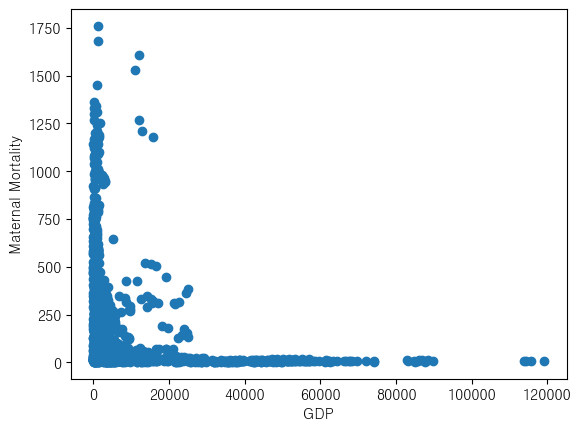

In [1394]:
# - [4-2] 시각화 
plt.scatter(LifeDF['GDP'], LifeDF['Maternal Mortality'])
plt.xlabel('GDP')
plt.ylabel('Maternal Mortality')
plt.show()

In [1395]:
LifeDF.corr(numeric_only=True)['GDP'].sort_values()

Maternal Mortality                -0.291842
 HIV/AIDS                         -0.153879
under-five deaths                 -0.117437
infant deaths                     -0.113752
Population                        -0.030964
Year                               0.024283
Diphtheria                         0.198832
Total expenditure                  0.213583
Alcohol                            0.380961
Schooling                          0.453363
Income composition of resources    0.489365
percentage expenditure             0.838049
GDP                                1.000000
Name: GDP, dtype: float64

#### LifeDF의 선진국 여부가, 모성 사망률에 영향을 주나?

In [1396]:
# 선진국 여부.
sumDing = 0
sumDed = 0

Developing = list(StateDF['Maternal Mortality'][StateDF['Status']=='Developing'])
for i in Developing:
    sumDing += int(i)


Developed = list(StateDF['Maternal Mortality'][StateDF['Status']=='Developed'])
for i in Developed:
    sumDed += int(i)
# Developed = list 
#  = dataDF['origin'].value_counts()

sumDing, sumDed

(317243, 4333)

In [1397]:
int(LifeDF['Maternal Mortality'].sum()) == sumDing + sumDed

True

<function matplotlib.pyplot.show(close=None, block=None)>

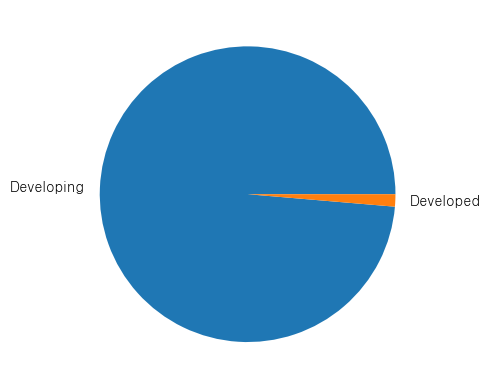

In [1398]:
plt.pie([sumDing, sumDed],labels=['Developing','Developed'])
plt.show

##### 그럼 개발도상국 사이에서의 GDP가 모성 사망률에 영향을 주나?

In [1399]:
DevelopedDF = LifeDF[LifeDF['Status']=='Developing']

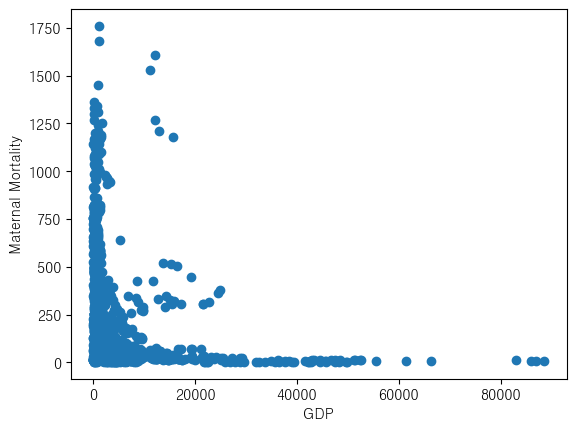

In [1400]:
plt.scatter(DevelopedDF['GDP'], DevelopedDF['Maternal Mortality'])
plt.xlabel('GDP')
plt.ylabel('Maternal Mortality')
plt.show()

C:\Users\kjy19\AppData\Local\Temp\ipykernel_27512\1406273816.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Low_Developed = DevelopedDF[LifeDF['GDP']<40000]


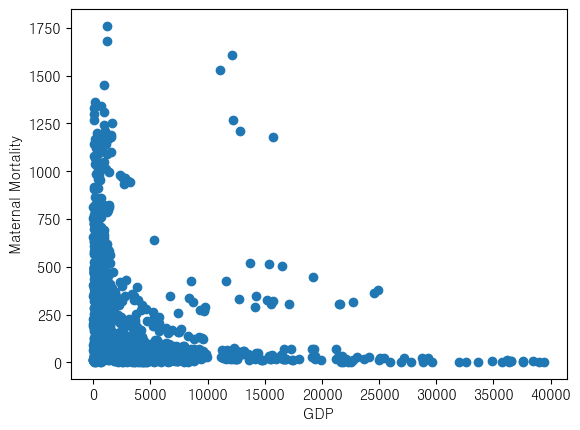

In [1401]:
Low_Developed = DevelopedDF[LifeDF['GDP']<40000]


plt.scatter(Low_Developed['GDP'], Low_Developed['Maternal Mortality'])
plt.xlabel('GDP')
plt.ylabel('Maternal Mortality')
plt.show()

C:\Users\kjy19\AppData\Local\Temp\ipykernel_27512\2914272154.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Lower_Developed = DevelopedDF[LifeDF['GDP']<4000]


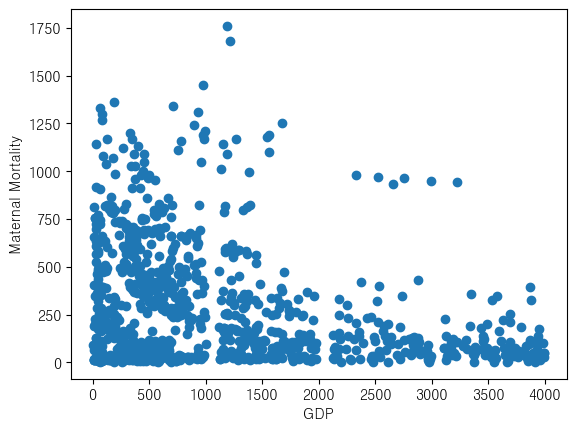

In [1402]:
Lower_Developed = DevelopedDF[LifeDF['GDP']<4000]


plt.scatter(Lower_Developed['GDP'], Lower_Developed['Maternal Mortality'])
plt.xlabel('GDP')
plt.ylabel('Maternal Mortality')
plt.show()

In [1403]:
Lower_Developed.corr(numeric_only=True)['GDP'].sort_values()

Maternal Mortality                -0.297875
 HIV/AIDS                         -0.171286
under-five deaths                 -0.043812
infant deaths                     -0.038404
Total expenditure                 -0.011317
Population                         0.003348
Year                               0.050306
Alcohol                            0.131897
Diphtheria                         0.155664
Schooling                          0.342290
Income composition of resources    0.363827
percentage expenditure             0.764756
GDP                                1.000000
Name: GDP, dtype: float64

#### 산모 사망률 Top10 나라와 GDP 관계

In [1404]:
Top10List

['Afghanistan',
 'Central African Republic',
 'Ethiopia',
 'Guinea',
 'Guinea-Bissau',
 'Mauritania',
 'Nigeria',
 'Sierra Leone',
 'South Sudan',
 'Chad']

In [1405]:
LifeDF.set_index('Country', inplace=True)

In [1406]:
Top10List

['Afghanistan',
 'Central African Republic',
 'Ethiopia',
 'Guinea',
 'Guinea-Bissau',
 'Mauritania',
 'Nigeria',
 'Sierra Leone',
 'South Sudan',
 'Chad']

In [1407]:
Worst10 = LifeDF[(LifeDF.index == 'Afghanistan')
       | (LifeDF.index == 'Central African Republic')
       | (LifeDF.index == 'Ethiopia')
       | (LifeDF.index == 'Guinea')
       | (LifeDF.index == 'Guinea-Bissau')
       | (LifeDF.index == 'Mauritania')
       | (LifeDF.index ==  'Nigeria')
       | (LifeDF.index == 'South Sudan')
       | (LifeDF.index == 'Sierra Leone')
       | (LifeDF.index ==  'Chad')]

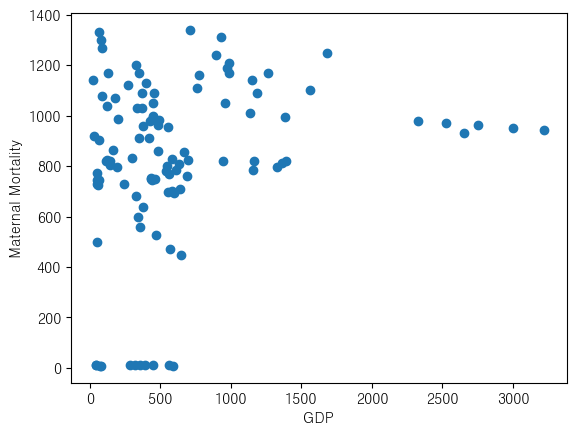

In [1408]:
plt.scatter(Worst10['GDP'], Worst10['Maternal Mortality'])
plt.xlabel('GDP')
plt.ylabel('Maternal Mortality')
plt.show()

#### 이상치 검토

In [1409]:
# GDP 2000~3500
# MM = 750~1250
# GDP 4000 이하의 나라에서 이상치 뽑기.
Lower_Developed[(Lower_Developed['GDP']>2000)
               & (Lower_Developed['GDP']<3500)
            & (Lower_Developed['Maternal Mortality']<1250)
            & (Lower_Developed['Maternal Mortality']>750)]

,Country,Year,Status,infant deaths,Alcohol,percentage expenditure,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,Maternal Mortality
1210,Nigeria,2015,Developing,483,NaN,0.000000,747,NaN,49.0,3.7,2655.157977,181181744.0,0.525,10.0,931
1211,Nigeria,2014,Developing,490,0.01,263.211103,759,3.67,49.0,3.9,3221.678128,1764652.0,0.521,10.0,943
1212,Nigeria,2013,Developing,498,8.30,194.203288,773,3.70,46.0,3.9,2996.964320,17182933.0,0.514,9.8,951
1213,Nigeria,2012,Developing,505,8.54,204.718626,788,3.30,42.0,4.4,2755.297787,167297284.0,0.507,9.7,963
1214,Nigeria,2011,Developing,513,8.75,187.573319,802,3.69,48.0,4.7,2527.942300,16287776.0,0.500,9.6,972
1215,Nigeria,2010,Developing,521,8.90,133.123087,817,3.47,54.0,4.8,2327.326700,158578261.0,0.492,9.5,978


#### 1000명 당 의사 수

In [1411]:
docDF[docDF['LOCATION']=='NG']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
